# DBSCAN Clustering Algorithm

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.[1] It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

It views clusters as areas of high density separated by areas of low density. Due to this rather generic view,
clusters found by DBSCAN can be any shape unlike k-means which assumes that clusters are convex shaped. The central 
component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is 
therefore a set of core samples, each close to each other and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples 
and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density 
necessary to form a cluster.

The DBSCAN algorithm can be abstracted into the following steps:

1)Find the ε (eps) neighbors of every point, and identify the core points with more than minPts neighbors.

2)Find the connected components of core points on the neighbor graph, ignoring all non-core points.

3)Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

# Data Setup

 Samples of windspeeds and rainfall are taken as data for the ALgorithm.
The first parameter is set as Wind Speed and second parameter is taken as rainfall. Windspeed is in Miles/Hour and 
Rainfall in Centimeters

Data = [[90,1.2],[85,.9],[60,3.1],[70,2.3],[100,4.2],[120,5.1],[35,6.2],[70,3.4],[45,3.2],[55,4.1],[82,1.3],[90,4.8],[95,6.2]
        ,[69,3.1],[83,6.2],[85,3.2],[95,4.3],[120,7.2],[110,6.5],[105,5.5]]

# Algorithm

About the parameters in DBSCAN Algorithm:

1)Homogenity: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

2)Completeness: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

3)The V-measure is the harmonic mean between homogeneity and completeness:
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

4)The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

5)Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information (MI) score to account for chance. It accounts for the fact that the MI is generally higher for two clusterings with a larger number of clusters, regardless of whether there is actually more information shared. For two clusterings U and V, the AMI is given as:
AMI(U, V) = [MI(U, V) - E(MI(U, V))] / [max(H(U), H(V)) - E(MI(U, V))]
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

6)Silhoutte Co-efficient:The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

# Implementation

In [11]:
# DBScan 

print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers =  [[90,1.2],[85,0.9],[60,3.1],[70,2.3],[100,4.2],[120,5.1],[35,6.2],[70,3.4],[45,3.2],[55,4.1],[82,1.3],[90,4.8]
             ,[95,6.2],[69,3.1],[83,6.2],[85,3.2],[95,4.3],[120,7.2],[110,6.5],[105,5.5]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.5,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################


Automatically created module for IPython interactive environment
Estimated number of clusters: 6
Homogeneity: 0.461
Completeness: 0.991
V-measure: 0.629
Adjusted Rand Index: 0.176
Adjusted Mutual Information: 0.447
Silhouette Coefficient: 0.159


# Plotting Graphs

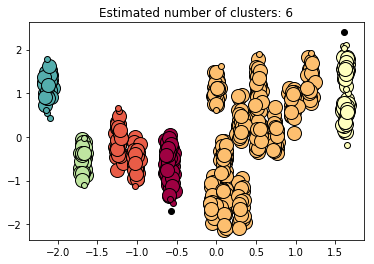

In [12]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Changing the order of data inputs - This will change the clusters based on the order of data input.

Automatically created module for IPython interactive environment
Estimated number of clusters: 6
Homogeneity: 0.460
Completeness: 1.000
V-measure: 0.630
Adjusted Rand Index: 0.176
Adjusted Mutual Information: 0.447
Silhouette Coefficient: 0.173


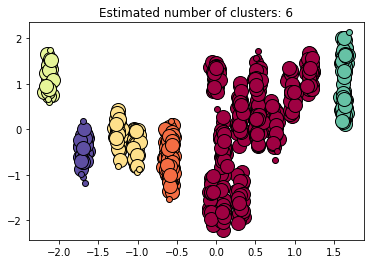

In [13]:
# DBScan 

print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data -- the order of data inputs is changed here
centers =  [[90,1.2],[60,3.1],[70,2.3],[100,4.2],[120,5.1],[70,3.4],[45,3.2],[55,4.1],[82,1.3],[90,4.8]
             ,[95,6.2],[69,3.1],[85,3.2],[95,4.3],[120,7.2],[110,6.5],[105,5.5],[85,0.9],[35,6.2],[83,6.2]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.5,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Advantages and Disadvantages of the DBSCAN algorithm:

Advantages:
1)DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.

2)DBSCAN can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.

3)DBSCAN has a notion of noise, and is robust to outliers.

Disadvantages:

1)DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data is processed. For most data sets and domains, this situation fortunately does not arise often and has little impact on the clustering result:[4] both on core points and noise points, DBSCAN is deterministic.

2)DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.

The number of clusters is 6 in both the cases, but the data is clustered differently based on the order of the inputs.
The data with similar wind speeds are clustered differently. 

# Citations and References:




http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering  - 2.3.7

http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

https://en.wikipedia.org/wiki/DBSCAN

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs